# ÖDEV-5 Ek
## Ad Soyad : Muhammed Cemal Eryiğit
### Öğrenci No : 1801022024 

# Ön hazırlık ödevleri (ÖDEV-5 Ek başlığı altındaki soruların çözümleri aşağıda verilecek) 

# SORU-1

### a)

In [1]:
import matplotlib.pyplot as plt # grafik çizimi için gerekli kütüphanenin aktifleştirilmesi
import numpy as np # dizi işlemleri için kütüphane aktif hale getirilir.

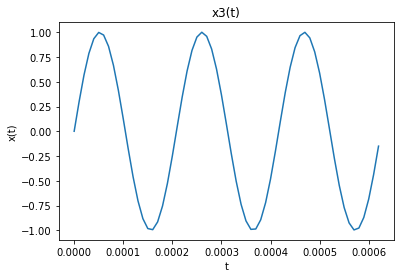

In [2]:
F=4800 
T=1/F # x işaretinin periyodu
k=3 # Periyot sayısı
t=np.arange(0.,k*T,0.00001) #3 periyot çizdirilme aralığı
x=np.sin(9600*np.pi*t)
plt.figure()
plt.title("x3(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.plot(t,x)
plt.show()

### b)

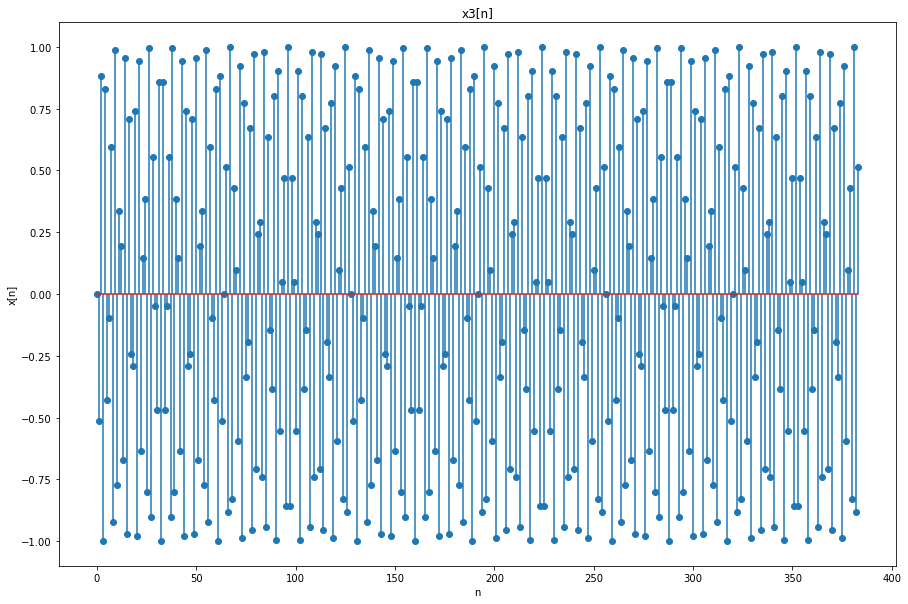

In [3]:
Fs=8192 # örnekleme frekansı
Ts=1/Fs # örnekleme periyodu
N=128 #9600pi*N/8192 = 2pi*k 75N=128k, k = 75 için N
n=np.arange(0.,3*N) #3 periyot çizdirilme aralığı !! çözünürlüğü sinyal sayısı fazla olduğundan belirlenmedi python otomatik belirliyor
x3n=np.sin(9600*np.pi*n*Ts) 
plt.figure(figsize = (15,10))
plt.stem(n,x3n)
plt.title("x3[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.show() 

### c)

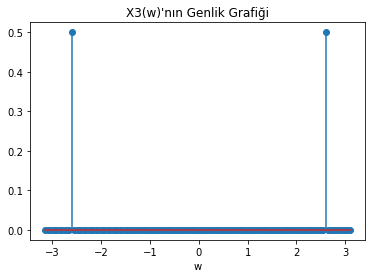

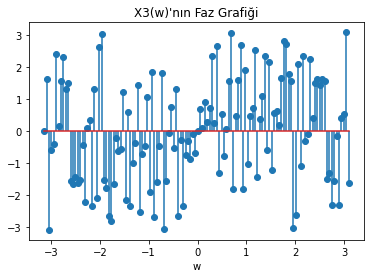

In [4]:
N=128 # örnek sayısı
w=np.linspace(-np.pi,np.pi-(2*np.pi/N),N)
x_w=np.fft.fft(x3n,N)/N # x[n] işaretinin fourier transformu
x_w=np.fft.fftshift(x_w)

plt.figure()
plt.stem(w,np.abs(x_w))
plt.title("X3(w)'nın Genlik Grafiği")
plt.xlabel("w")
plt.show()
plt.figure() 
plt.stem(w,np.angle(x_w))
plt.title("X3(w)'nın Faz Grafiği")
plt.xlabel("w") 
plt.show()

### d)

### $ x_4[n] = Asin(B\pi n)$ şeklinde olan işaretin A katsayısı (genliği) w genlik grafiğindeki 1 dürtünün 2 katı olduğu için A=1 olarak doğrudan bulunur.

### B katsayısı için 1 dürtüden $ w = B \pi $  ifadesini kullanarak elde edebiliriz. Buradan B = $ 2.60 /\pi$ şeklinde ifade edilir

### İşaret sin cinsinden istenip verildiğine göre ve fft genlik grafiğini de baz aldığımızda işaretin bir faz açısının olduğunuz buluruz (faz $\pi/2$)

### e)

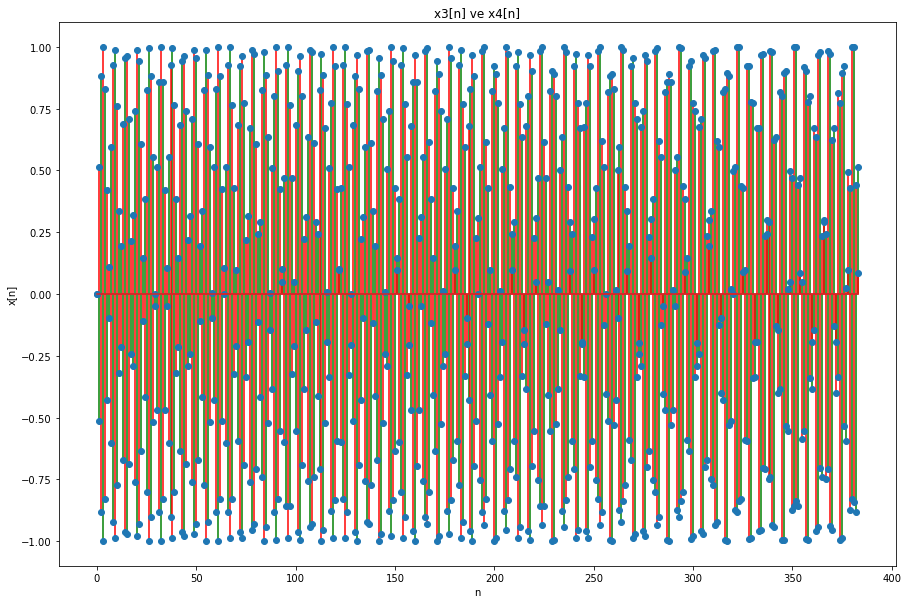

In [5]:
Fs=8192 # örnekleme frekansı
Ts=1/Fs # örnekleme periyodu
N=128 #9600pi*N/8192 = 2pi*k 75N=128k, k = 75 için N
n=np.arange(0.,3*N) #3 periyot çizdirilme aralığı
x3n=np.sin(9600*np.pi*n*Ts)
x4n=np.sin((2.60/np.pi)*np.pi*n)

plt.figure(figsize = (15,10))
plt.stem(n,x3n,linefmt='green')
plt.stem(n,x4n,linefmt='red')
plt.title("x3[n] ve x4[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.show()

# SORU-2

<Figure size 432x288 with 0 Axes>

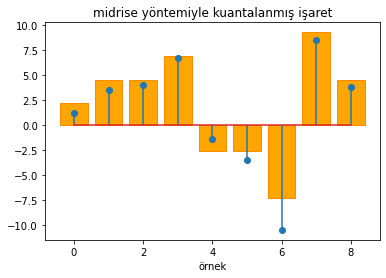

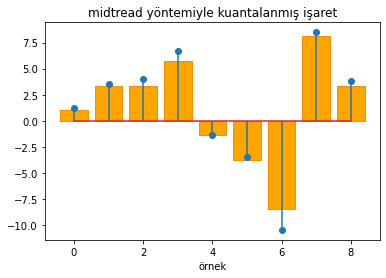

In [11]:
def quantize(x, S):
    X = x.reshape((-1,1))
    S = S.reshape((1,-1))
    dists = abs(X-S)
    nearestIndex = dists.argmin(axis=1)
    quantized = S.flat[nearestIndex]
    return quantized.reshape(x.shape)

𝑥n=np.array([1.25, 3.5, 4, 6.7, -1.4, -3.5, -10.5, 8.5, 3.8])
n = np.arange(0,9)

k_bit= 3 
Max_range= np.amax(x)-np.amin(x) 
q=pow(2,k_bit) 
delta = Max_range/q 
S_midrise = -np.amax(x) + delta/2 + np.arange(q)*delta 
S_midtread = -np.amax(x) + np.arange(q)*delta

y_midtrise = quantize(x, S_midrise) # mid-rise yöntemi ile kuantalanmış değerler
y_midtread = quantize(x, S_midtread) # mid-tread yöntemi ile kuantalanmış değerler

plt.figure() 
fig, ax = plt.subplots()
ax.stem(n,xn) # x[n] işaretinin grafiğinin çizdirilmesi
ax.bar(n,y_midtrise,color='orange',edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirilmes
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.title('midrise yöntemiyle kuantalanmış işaret')
fig, ax = plt.subplots() 
ax.stem(n,xn) # x[n] işaretinin grafiğinin çizdirilmesi
ax.bar(n,y_midtread,color='orange',edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirilmes
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.title('midtread yöntemiyle kuantalanmış işaret')
plt.show() # grafiklerin gösterilmesi